## 국내유가와 국제유가의 상관관계 분석

In [2]:
import pandas as pd
import numpy as np
import re

In [3]:
#국내유가 데이터 불러오기 
domestic_data = pd.read_csv('./data/부산시유가데이터_fillna.csv', encoding='utf-8', sep=',')
domestic_data.head()

,번호,지역,상호,주소,기간,상표,셀프여부,휘발유,경유
0,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220214,S-OIL,셀프,1638.0,1508.0
1,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220215,S-OIL,셀프,1638.0,1518.0
2,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220216,S-OIL,셀프,1668.0,1518.0
3,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220217,S-OIL,셀프,1678.0,1528.0
4,A0033158,부산 강서구,(주)DJS신항만물류단지주유소,부산 강서구 가락대로 834 (범방동),20220218,S-OIL,셀프,1678.0,1538.0


In [4]:
#국제유가 데이터 불러오기 
international_data = pd.read_csv('./data/기간별 환율(20220214-20220816).csv', encoding='utf-8', sep=',')
international_data.head()

,일자,매매기준율
0,20220816,"1,308.40상승2.40"
1,20220815,"1,306.00상승4.50"
2,20220814,"1,306.00상승4.50"
3,20220813,"1,306.00상승4.50"
4,20220812,"1,306.00상승4.50"


#### 매매기준율에서 환율만 추출하기

In [5]:
international_data["매매기준율"] = international_data["매매기준율"].apply(lambda x : re.split("[ㄱ-ㅣ가-힣]", x)).str.get(0).str.replace(",","").astype(float)
international_data.head()

,일자,매매기준율
0,20220816,1308.4
1,20220815,1306.0
2,20220814,1306.0
3,20220813,1306.0
4,20220812,1306.0


In [6]:
international_data

,일자,매매기준율
0,20220816,1308.4
1,20220815,1306.0
2,20220814,1306.0
3,20220813,1306.0
4,20220812,1306.0
...,...,...
179,20220218,1195.0
180,20220217,1197.5
181,20220216,1196.5
182,20220215,1198.0


In [7]:
#날짜 오름차순으로 정리
international_data.sort_values(by=["일자","매매기준율"], inplace=True)
international_data

,일자,매매기준율
183,20220214,1197.0
182,20220215,1198.0
181,20220216,1196.5
180,20220217,1197.5
179,20220218,1195.0
...,...,...
4,20220812,1306.0
3,20220813,1306.0
2,20220814,1306.0
1,20220815,1306.0


In [8]:
#인덱스 정리
international_data = international_data.reset_index().drop(columns="index")
international_data

,일자,매매기준율
0,20220214,1197.0
1,20220215,1198.0
2,20220216,1196.5
3,20220217,1197.5
4,20220218,1195.0
...,...,...
179,20220812,1306.0
180,20220813,1306.0
181,20220814,1306.0
182,20220815,1306.0


In [9]:
# 두바이유가 데이터 불러오기
du = pd.read_csv("./data/국제유가(두바이).csv", encoding="utf-8")
du.head()

,날짜,두바이_종가
0,2022-08-15,94.97
1,2022-08-12,96.48
2,2022-08-11,98.18
3,2022-08-10,96.87
4,2022-08-09,95.97


In [10]:
#날짜 오름차순으로 정리
du.sort_values(by=["날짜","두바이_종가"], inplace=True)
du

,날짜,두바이_종가
132,2022-02-03,89.16
131,2022-02-04,91.06
130,2022-02-07,90.76
129,2022-02-08,89.28
128,2022-02-09,89.88
...,...,...
4,2022-08-09,95.97
3,2022-08-10,96.87
2,2022-08-11,98.18
1,2022-08-12,96.48


In [11]:
#인덱스 정리
du = du.reset_index().drop(columns="index")
du

,날짜,두바이_종가
0,2022-02-03,89.16
1,2022-02-04,91.06
2,2022-02-07,90.76
3,2022-02-08,89.28
4,2022-02-09,89.88
...,...,...
128,2022-08-09,95.97
129,2022-08-10,96.87
130,2022-08-11,98.18
131,2022-08-12,96.48


#### 두바이 유가, 국내 유가 합치기

In [12]:
# int64->object->datetime 타입변경
international_data["일자"] = pd.to_datetime(international_data["일자"].astype(str))
international_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   일자      184 non-null    datetime64[ns]
 1   매매기준율   184 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.0 KB


In [13]:
# object->datetime 타입변경
du["날짜"] = pd.to_datetime(du["날짜"])
du.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133 entries, 0 to 132
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      133 non-null    datetime64[ns]
 1   두바이_종가  133 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 KB


In [14]:
# 두바이 유가, 국내 유가 합치기
int_du_price = pd.merge(international_data, du, left_on="일자", right_on="날짜")
int_du_price

,일자,매매기준율,날짜,두바이_종가
0,2022-02-14,1197.0,2022-02-14,92.61
1,2022-02-15,1198.0,2022-02-15,90.86
2,2022-02-16,1196.5,2022-02-16,91.56
3,2022-02-17,1197.5,2022-02-17,90.67
4,2022-02-18,1195.0,2022-02-18,90.90
...,...,...,...,...
121,2022-08-09,1306.0,2022-08-09,95.97
122,2022-08-10,1305.0,2022-08-10,96.87
123,2022-08-11,1301.5,2022-08-11,98.18
124,2022-08-12,1306.0,2022-08-12,96.48


In [15]:
#날짜 컬럼 삭제
int_du_price = int_du_price.drop(columns="날짜")
int_du_price

,일자,매매기준율,두바이_종가
0,2022-02-14,1197.0,92.61
1,2022-02-15,1198.0,90.86
2,2022-02-16,1196.5,91.56
3,2022-02-17,1197.5,90.67
4,2022-02-18,1195.0,90.90
...,...,...,...
121,2022-08-09,1306.0,95.97
122,2022-08-10,1305.0,96.87
123,2022-08-11,1301.5,98.18
124,2022-08-12,1306.0,96.48


In [16]:
# 2월14일부터 8월 9일 외의 데이터 삭제
int_du_price = int_du_price.iloc[:122]
int_du_price

,일자,매매기준율,두바이_종가
0,2022-02-14,1197.0,92.61
1,2022-02-15,1198.0,90.86
2,2022-02-16,1196.5,91.56
3,2022-02-17,1197.5,90.67
4,2022-02-18,1195.0,90.90
...,...,...,...
117,2022-08-03,1311.5,95.97
118,2022-08-04,1310.5,94.08
119,2022-08-05,1299.5,94.41
120,2022-08-08,1304.5,96.04


1 bbl(배럴당) = 158.9ℓ(리터)

KRW /ℓ= (두바이유(w)*환율)/158.9ℓ

In [19]:
int_du_price['환전'] = int_du_price['두바이_종가'] * int_du_price['매매기준율'] / 158.9
int_du_price

C:\Users\admin\AppData\Local\Temp\ipykernel_16196\2507264921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_du_price['환전'] = int_du_price['두바이_종가'] * int_du_price['매매기준율'] / 158.9


In [25]:
int_du_price['환전'] = int_du_price['환전'].round(1)
int_du_price

C:\Users\admin\AppData\Local\Temp\ipykernel_16196\1870019970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  int_du_price['환전'] = int_du_price['환전'].round(1)


,일자,매매기준율,두바이_종가,환전
0,2022-02-14,1197.0,92.61,697.6
1,2022-02-15,1198.0,90.86,685.0
2,2022-02-16,1196.5,91.56,689.4
3,2022-02-17,1197.5,90.67,683.3
4,2022-02-18,1195.0,90.90,683.6
...,...,...,...,...
117,2022-08-03,1311.5,95.97,792.1
118,2022-08-04,1310.5,94.08,775.9
119,2022-08-05,1299.5,94.41,772.1
120,2022-08-08,1304.5,96.04,788.4


In [22]:
domestic_data.columns

Index(['번호', '지역', '상호', '주소', '기간', '상표', '셀프여부', '휘발유', '경유'], dtype='object')

In [29]:
# object->datetime 타입변경
domestic_data["기간"] = pd.to_datetime(domestic_data["기간"].astype(str))
domestic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67234 entries, 0 to 67233
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      67234 non-null  object        
 1   지역      67234 non-null  object        
 2   상호      67234 non-null  object        
 3   주소      67234 non-null  object        
 4   기간      67234 non-null  datetime64[ns]
 5   상표      67234 non-null  object        
 6   셀프여부    67234 non-null  object        
 7   휘발유     67234 non-null  float64       
 8   경유      67234 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 4.6+ MB


In [30]:
domestic_price = domestic_data.groupby(['기간'])[['휘발유','경유']].mean().round(1)
domestic_price

,휘발유,경유
기간,,
2022-02-14,1681.6,1513.2
2022-02-15,1686.4,1517.1
2022-02-16,1692.5,1522.9
2022-02-17,1697.0,1529.0
2022-02-18,1699.5,1532.2
...,...,...
2022-08-05,1831.1,1923.1
2022-08-06,1825.3,1917.6
2022-08-07,1823.2,1915.7


In [31]:
# 두바이 유가, 휘발유가, 경유가 합치기
oil_price = pd.merge(int_du_price, domestic_price, left_on="일자", right_on="기간")
oil_price

,일자,매매기준율,두바이_종가,환전,휘발유,경유
0,2022-02-14,1197.0,92.61,697.6,1681.6,1513.2
1,2022-02-15,1198.0,90.86,685.0,1686.4,1517.1
2,2022-02-16,1196.5,91.56,689.4,1692.5,1522.9
3,2022-02-17,1197.5,90.67,683.3,1697.0,1529.0
4,2022-02-18,1195.0,90.90,683.6,1699.5,1532.2
...,...,...,...,...,...,...
117,2022-08-03,1311.5,95.97,792.1,1848.9,1935.1
118,2022-08-04,1310.5,94.08,775.9,1838.0,1927.3
119,2022-08-05,1299.5,94.41,772.1,1831.1,1923.1
120,2022-08-08,1304.5,96.04,788.4,1813.1,1905.8


In [33]:
oil_price = oil_price.drop(columns=['매매기준율','두바이_종가'])
oil_price

,일자,환전,휘발유,경유
0,2022-02-14,697.6,1681.6,1513.2
1,2022-02-15,685.0,1686.4,1517.1
2,2022-02-16,689.4,1692.5,1522.9
3,2022-02-17,683.3,1697.0,1529.0
4,2022-02-18,683.6,1699.5,1532.2
...,...,...,...,...
117,2022-08-03,792.1,1848.9,1935.1
118,2022-08-04,775.9,1838.0,1927.3
119,2022-08-05,772.1,1831.1,1923.1
120,2022-08-08,788.4,1813.1,1905.8


In [34]:
oil_price_corr = oil_price.corr(method='pearson')
oil_price_corr

,환전,휘발유,경유
환전,1.000000,0.683768,0.656538
휘발유,0.683768,1.000000,0.906916
경유,0.656538,0.906916,1.000000


In [47]:
# 기본적인 패키지부터 추가
import numpy as np
import pandas as pd
import scipy as super

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams, style, font_manager, rc

In [55]:
# 폰트 설정
font_manager.get_fontconfig_fonts()
font_path = "C:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_path).get_name()
plt.rc("font", family=get_font_name())

C:\Users\admin\AppData\Local\Temp\ipykernel_16196\4031157145.py:2: MatplotlibDeprecationWarning: 
The get_fontconfig_fonts function was deprecated in Matplotlib 3.5 and will be removed two minor releases later.
  font_manager.get_fontconfig_fonts()


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 55064 (\N{HANGUL SYLLABLE HWI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 48156 (\N{HANGUL SYLLABLE BAL}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:88: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 55064

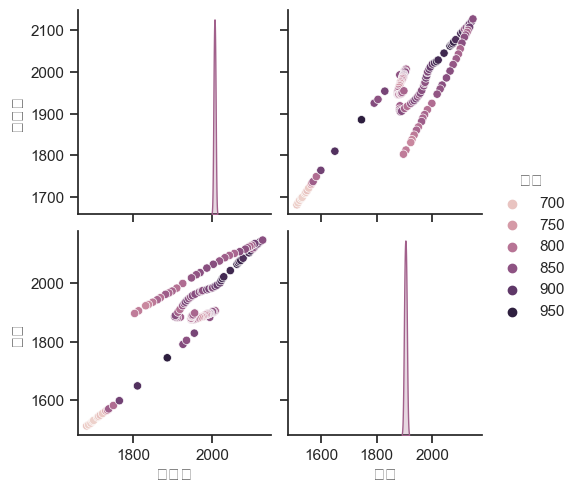

In [56]:
sns.set(style='ticks', color_codes=True)
# bool 타입은 산점도에서 오류내기 때문에 adult_male, alone bool -> int32 로 변환/ object는 자동으로 제외돼서 나타남(vars=로 선택안해도 됨)
sns.pairplot(oil_price, hue='환전')
plt.show()

### 머신러닝 기본 설정

In [ ]:
# 머신러닝 패키지 추가
import statsmodels.api as sm
import sklearn as sk